In [208]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [209]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [210]:
data = data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [211]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [212]:
#fill in Nan by age by mean sex
grouped_means = data.groupby('Sex')['Age'].transform('mean')
data['Age'] = data['Age'].fillna(grouped_means)
data.shape

(891, 8)

In [213]:
#delete from data other Nan
data = data.dropna()
data.shape

(889, 8)

In [214]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [215]:
data = pd.get_dummies(data, columns=['Sex', ]).drop('Sex_female',axis=1)

In [216]:
Y = data['Survived']
X = data.drop('Survived', axis=1)

In [217]:
X.head(), Y.head()

(   Pclass   Age  SibSp  Parch     Fare Embarked  Sex_male
 0       3  22.0      1      0   7.2500        S         1
 1       1  38.0      1      0  71.2833        C         0
 2       3  26.0      0      0   7.9250        S         0
 3       1  35.0      1      0  53.1000        S         0
 4       3  35.0      0      0   8.0500        S         1,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [218]:
X['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [219]:
X = pd.get_dummies(X, columns = ['Embarked',])

In [220]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,38.000000,1,0,71.2833,0,1,0,0
2,3,26.000000,0,0,7.9250,0,0,0,1
3,1,35.000000,1,0,53.1000,0,0,0,1
4,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,0,1
887,1,19.000000,0,0,30.0000,0,0,0,1
888,3,27.915709,1,2,23.4500,0,0,0,1
889,1,26.000000,0,0,30.0000,1,1,0,0


In [221]:
X = X.drop('Embarked_C', axis=1)

In [222]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1
888,3,27.915709,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


In [223]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

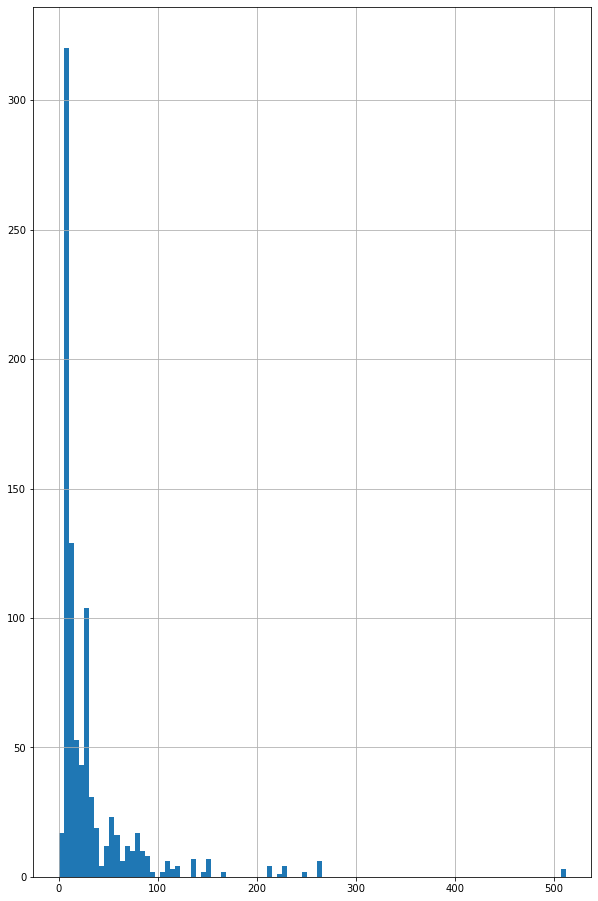

In [224]:
#check for discard

fig = plt.figure()

fig.set_size_inches((10, 16))

data['Fare'].hist(bins=100)

plt.show()

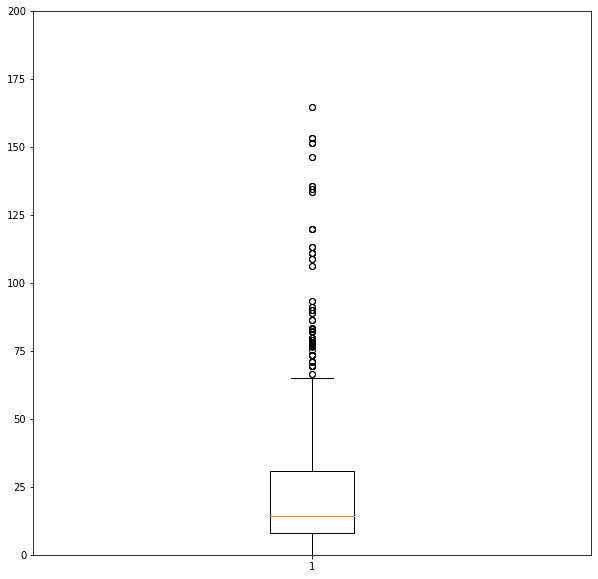

In [225]:
fig = plt.figure()
fig.set_size_inches((10, 10))
plt.boxplot(X['Fare'].values)
plt.ylim(0, 200)
plt.show()

In [236]:
q_high = X['Fare'].quantile(0.75)
q_low = X['Fare'].quantile(0.25)
print(q_high, q_low)
tentacle_length = q_high - q_low
upper_tentacle = q_high + 3 * tentacle_length 

31.0 7.8958


In [237]:
#X = X[X['Fare'] < upper_tentacle]

In [228]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1
888,3,27.915709,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


In [229]:
X.corr()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Pclass,1.000000,-0.327009,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,-0.327009,1.000000,-0.236188,-0.181612,0.086114,0.108611,-0.018964,-0.017519
SibSp,0.081656,-0.236188,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,0.016824,-0.181612,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,-0.548193,0.086114,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
Sex_male,0.127741,0.108611,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Embarked_Q,0.220558,-0.018964,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
Embarked_S,0.076466,-0.017519,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


In [230]:
test = X.drop(['Pclass', 'Parch', 'Embarked_S'], axis=1)

In [231]:
test.corr()

,Age,SibSp,Fare,Sex_male,Embarked_Q
Age,1.000000,-0.236188,0.086114,0.108611,-0.018964
SibSp,-0.236188,1.000000,0.160887,-0.116348,-0.026692
Fare,0.086114,0.160887,1.000000,-0.179958,-0.116684
Sex_male,0.108611,-0.116348,-0.179958,1.000000,-0.075217
Embarked_Q,-0.018964,-0.026692,-0.116684,-0.075217,1.000000


---
---
---

In [245]:
from sklearn.model_selection import train_test_split

#Y = Y[:836]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)
#X_train, X_test, Y_train, Y_test = train_test_split(test, Y, random_state=0, test_size=0.2)


In [246]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


pipe = Pipeline([('scaler', StandardScaler()),
                 ('LR', LogisticRegression(penalty='none'))])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR', LogisticRegression(penalty='none'))])

In [247]:
pipe.score(X_test, Y_test)

0.7191011235955056

In [346]:
print(pipe.classes_)
print(pipe.predict(X_test.head(1)))
print(pipe.predict_proba(X_test.head(1)))

[0 1]
[1]
[[0.23137489 0.76862511]]


In [347]:
string = {'Pclass': [1], 'Age': [19.0], 'SibSp': [0], 'Parch': [0], 'Fare': [100], 'Sex_male': [1], 'Embarked_Q': [1], 'Embarked_S':[0]}

test = pd.DataFrame(string)
test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,19.0,0,0,100,1,1,0


In [348]:
print(pipe.predict(test))
print(pipe.predict_proba(test))

[1]
[[0.16932923 0.83067077]]
